## Spin phonon coupling
In this example, we'll see how the spin configuration affect the phonon frequency, agian in the simple 1d atomic chain. The Hamiltonian can be written as 
$$H=H_{elec} + H_{lattice}$$,
where the electron part has one orbital per site with only the first neighbor hopping, and there is a onsite Coulomb interaction. Thus the electron part can be written as the Hubbard Hamiltonian:
$$H_{elec}=\sum_{ij}t_{ij} c^{\dagger}_i c_j + c.c. + \frac{1}{2}\sum_i U n_{i\uparrow} n_{i\downarrow} $$.

The lattice part is $$H_{latt}=\frac{1}{2} K A^2$$, where A is the amplitude of the phonon mode. Here we consider the dimerization of the chain.

The electron-lattice coupling is that the $$t_{ij}=t+ c(\tau_i-\tau_j)$$, where c is the coefficient of electron phonon coupling. 

In this system , we consider the difference of the energies as function of phonon amplitude in spin configuration of FM and AFM state.

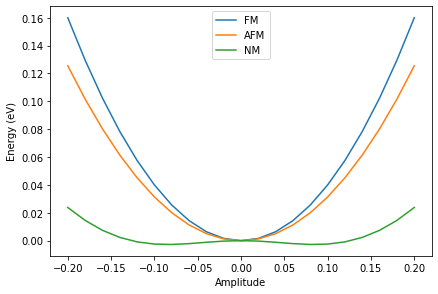

In [1]:
%matplotlib inline
import numpy as np
from  minimulti.electron.Hamiltonian import atoms_model
from minimulti.electron.basis2 import BasisSet, gen_basis_set, atoms_to_basis
from ase.atoms import Atoms
import matplotlib.pyplot as plt

def test_U_single_orb(t=1, U=9.9, spinat=[1,-1], nel=1, C_vx=0.0, C_tx=0.0, dx=0.0):
    # generate structure.
    atoms=Atoms(symbols='H', positions=[(0,0,0)], cell=[1,1,1])
    # generate basis set
    bset= atoms_to_basis(atoms, basis_dict={'H': ('s',)}, nspin=2)
    # generate model
    mymodel=atoms_model(atoms=atoms, basis_set=bset, nspin=2)
    # make supercell
    sc_matrix=np.diag([1,1,2])
    nsc=np.linalg.det(sc_matrix)
    mymodel=mymodel.make_supercell(sc_matrix)
    # onsite energy (tune v to make electron localized on one site)
    # mymodel.set_onsite(v,0)
    # mymodel.set_onsite(v,1)

    # prepare electron-lattice term.
    dv= C_vx * dx
    dt= C_tx * dx

    # 1D hopping along z. Format: t, i, j, R.
    # spin up
    mymodel.set_hop(t-dt, 0,2, [0,0,0])
    mymodel.set_hop(t+dt, 2,0,[0,0,1])
    # spin down
    mymodel.set_hop(t-dt, 1,3, [0,0,0])
    mymodel.set_hop(t+dt, 3,1, [0,0,1])

    mymodel.set_Hubbard_U(Utype='Kanamori', Hubbard_dict={'H':{'U':U, 'J':0,'L':0}}, DC_type='FLL-s')

    # initial magnetic moment.
    mymodel.set_initial_spin(spinat)

    # nel: number of electrons. Mixing: Pulay mixing factor
    # tol_energy: tolerence of energy
    # tol_rho: tolerence of rho
    mymodel.set(nel=nel*nsc, mixing=0.3, tol_energy=1e-8, tol_rho=1e-8, sigma=0.1)

    # K mesh.
    mymodel.set_kmesh([1,1,30])

    # Scf solve
    mymodel.scf_solve(print_iter_info=False, convention=2)
    #return mymodel._int_energy+mymodel._DC_energy#+mymodel._Uband_energy
    #return mymodel._band_energy+mymodel._Uband_energy
    return mymodel._total_energy, mymodel._band_energy+mymodel._Uband_energy, mymodel._int_energy+mymodel._DC_energy
def lattice_energy(dx, K=0.1):
    return K*dx**2
#test()
def energy_vs_disp(spinat=[1,1], label='FM', axes=None):
    dx_list=np.arange(-0.2,0.201, 0.02)
    etot_list=[]
    eelec_list=[]
    etb_list=[]
    eee_list=[]
    for dx in dx_list:
        e_electron, etb, eee=test_U_single_orb(t=1, U=5, spinat=spinat, nel=1, dx=dx, C_tx=1, C_vx=0.0)
        e_lattice=lattice_energy(dx, K=4)
        e=e_electron+e_lattice
        etot_list.append(e)
        eelec_list.append(e_electron)
        etb_list.append(etb)
        eee_list.append(eee)
    mid_point=len(dx_list)//2
    #es=np.array(e_list)
    #es=es-es[mid_point]
    axes.plot(dx_list,np.array(etot_list)-etot_list[mid_point], label=label)
    #axes[0].plot(dx_list,np.array(eelec_list)-eelec_list[mid_point], label=label)
    #axes[1].plot(dx_list,np.array(etb_list)-etb_list[mid_point])
    #axes[2].plot(dx_list,np.array(eee_list)-eee_list[mid_point])
    #axes[0].plot(dx_list,np.array(eelec_list), label=label)
    #axes[1].plot(dx_list,np.array(etb_list))
    #axes[2].plot(dx_list,np.array(eee_list))
fig, axes=plt.subplots(1, sharex=True)
energy_vs_disp(spinat=[1,1],label='FM', axes=axes)
energy_vs_disp(spinat=[1,-1], label='AFM', axes=axes)
energy_vs_disp(spinat=[0.0,-0.0], label='NM', axes=axes)
#plt.ylabel('E-E($\Delta x$=0)')
#plt.xlabel('$\Delta$x')
#axes[0].set_ylabel("$\Delta E$ (eV)")
#axes[0].legend()
#axes[1].set_ylabel("$\Delta E_{TB}$ (eV)")
#axes[2].set_ylabel("$\Delta E_{ee}$ (eV)")
#axes[2].set_xlabel("Amplitude")
plt.tight_layout()
plt.legend()
plt.xlabel('Amplitude')
plt.ylabel('Energy (eV)')
plt.subplots_adjust(hspace=0.01)
plt.show()
